In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

## Model Evaluation and Improvement


In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


### Cross-Validation

/Users/jubong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:2687: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  ret = ax.barh(*args, **kwargs)


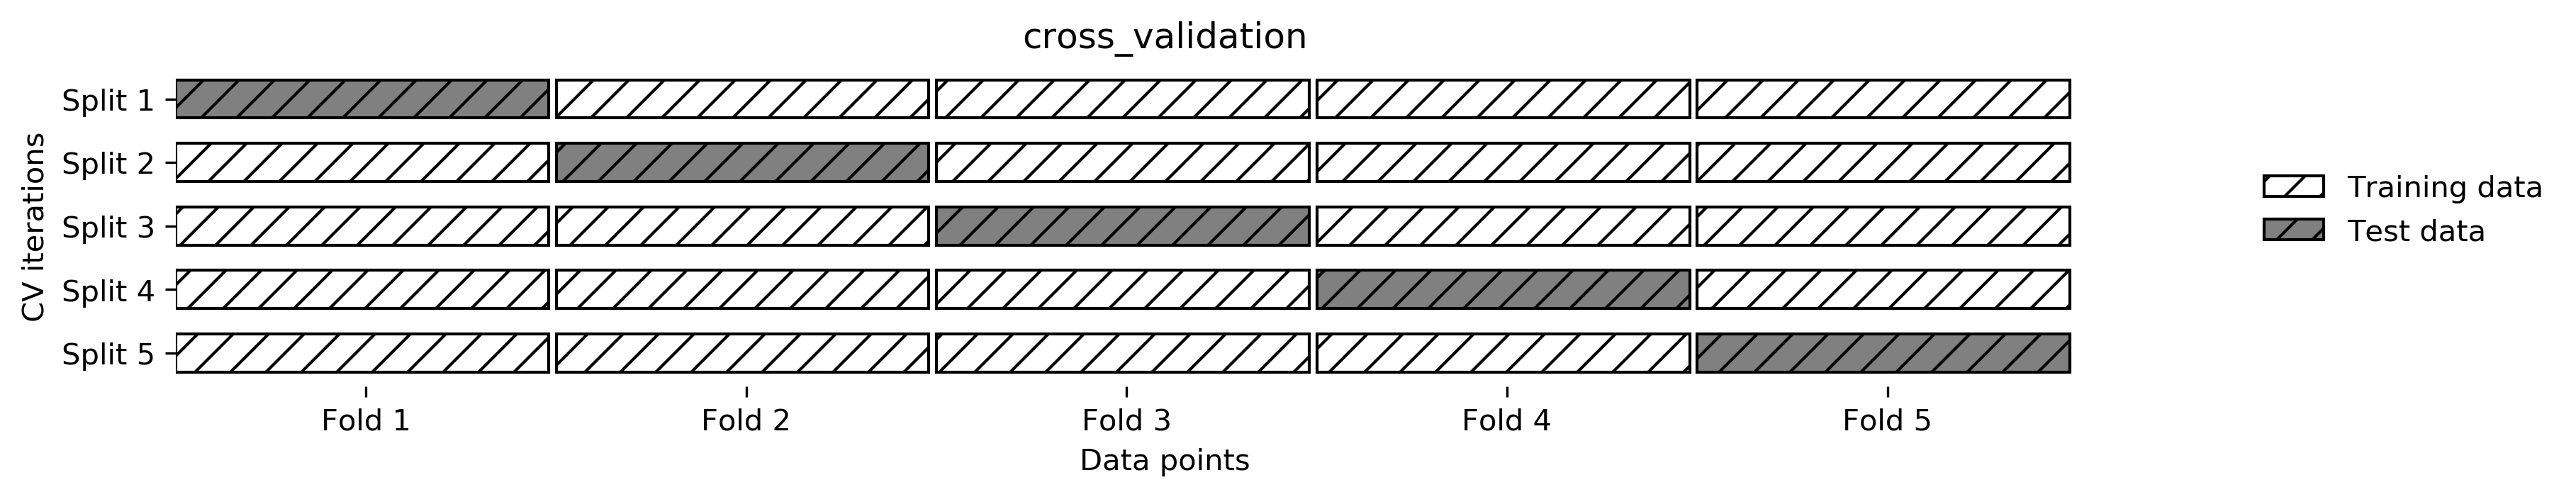

In [3]:
mglearn.plots.plot_cross_validation()

#### Cross-Validation in scikit-learn

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.961 0.922 0.958]


In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.    0.967 0.933 0.9   1.   ]


In [6]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


### Benefits of Cross-Validation

### Stratified K-Fold cross-validation and other strategies

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/Users/jubong/anaconda3/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:121: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color=colors, hatch="//", edgecolor='k', align='edge')
/Users/jubong/anaconda3/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:125: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align='edge')
/Users/jubong/anaconda3/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:158: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  height=.6, color="grey", hatch="//", edgecolor='k', align='edge')
/Users/jubong/anaconda3/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:163: MatplotlibDeprecationWarning: The *bot

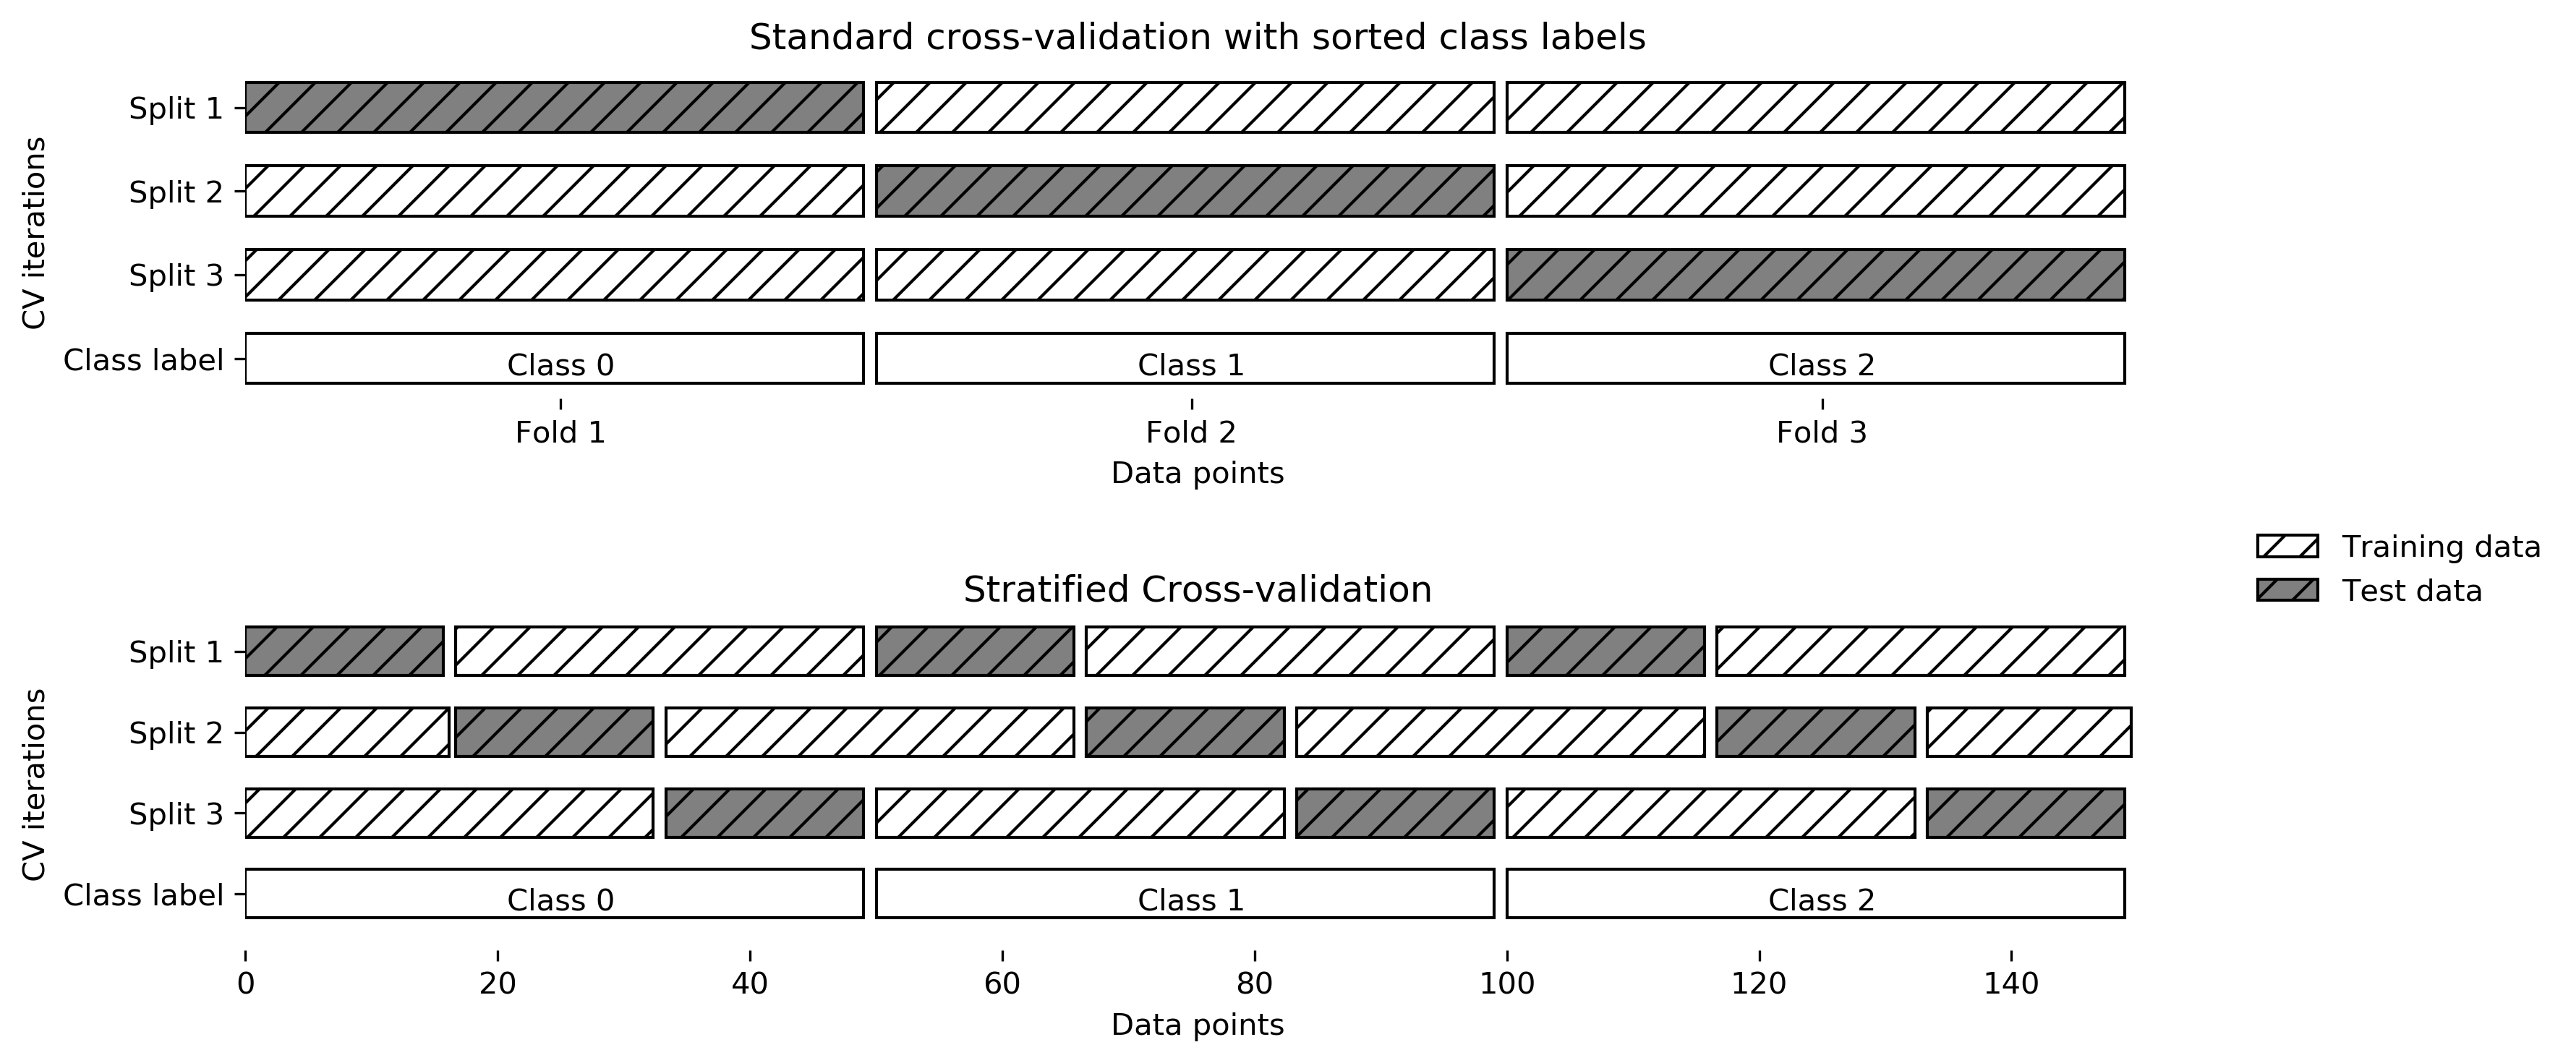

In [8]:
mglearn.plots.plot_stratified_cross_validation()

### More control over cross-validation

In [9]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [10]:
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.    0.933 0.433 0.967 0.433]


In [11]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [12]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.9  0.96 0.96]


#### Leave-one-out cross-validation

In [13]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


#### Shuffle-split cross-validation


/Users/jubong/anaconda3/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:85: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor='k', align='edge')


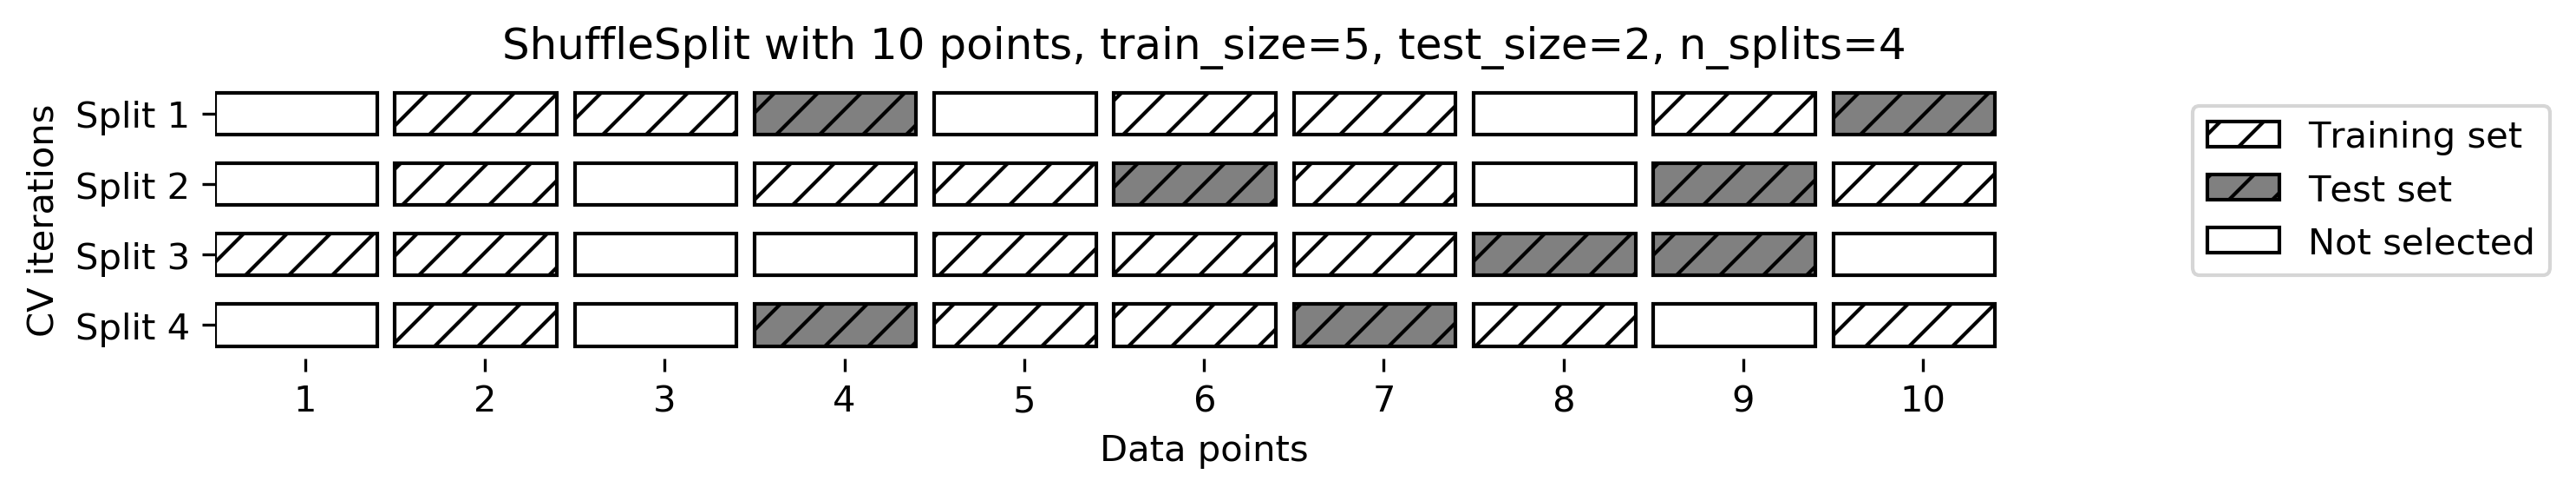

In [14]:
mglearn.plots.plot_shuffle_split()

In [15]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.907 0.973 0.907 0.947 0.973 0.867 0.947 0.96  0.973 0.947]


##### Cross-validation with groups

/Users/jubong/anaconda3/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:33: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor="k", align='edge')
/Users/jubong/anaconda3/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:39: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align="edge")


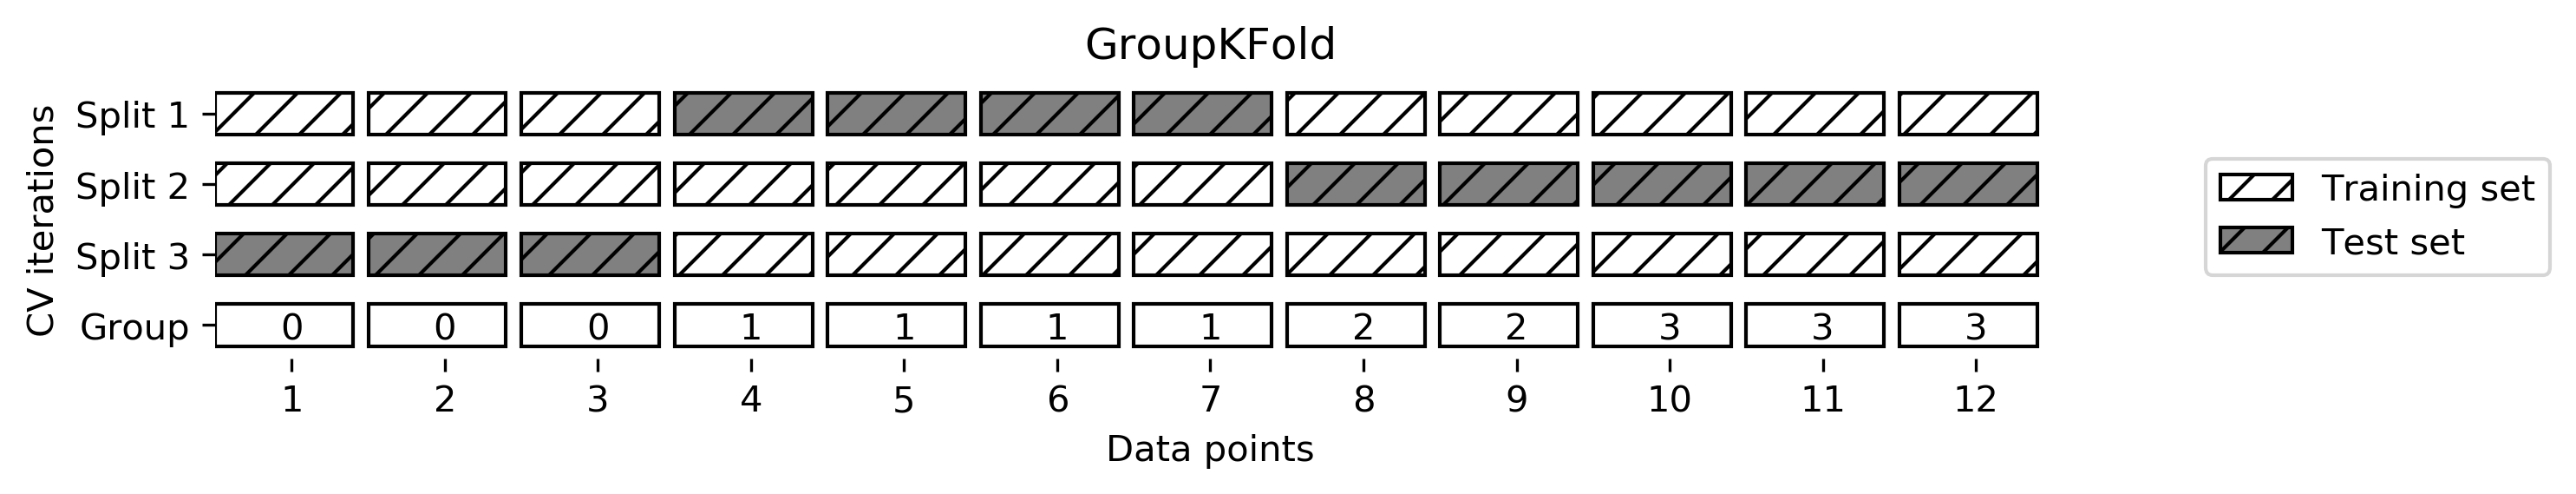

In [16]:
mglearn.plots.plot_group_kfold()

In [17]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75  0.8   0.667]
